# Imports

In [ ]:
!pip install -U pandas==1.4.2

ERROR: Could not find a version that satisfies the requirement pandas==1.4.2 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5)
ERROR: No matching distribution found for pandas==1.4.2


In [ ]:
!pip install imgaug==0.2.6

     |████████████████████████████████| 631 kB 4.0 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=2da8a7d5c6fcfdaeea1d63ee21ea91414bb9a5269da086f97f597f4b790c3e23
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 4.3 MB/s 
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 11.2 MB 42.9 MB/s 
     |████████████████████████████████| 96 kB 4.1 MB/s 
     |████████████████████████████████| 930 kB 45.9 MB/s 
     |████████████████████████████████| 1.1 MB 46.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=298dc34d38ea9f274792ee8a9acad533e6628da920fb96a00f891c313ad12721
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=1b803b22df24ca7b060e3954f1f642d5eb26ef8f9c8d5ea50717dd48d2d2c443
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for session-info: filename=session_info-1.0.0-py3-no

In [ ]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
import matplotlib as mpl
import re
import matplotlib.pyplot as plt
import scanpy.external as sce
import warnings

warnings.filterwarnings("ignore") #полезно, потому что сингл сэлл выплевывает много варнингов
sc.settings.verbosity = 3 #просим сканпи выводить максимально подробный лог действий
sc.settings.n_jobs = 1 #пытаемся ограничивать ядра у сканпи, чтобы не занимать весь сервер
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("white")

# Data

Для чтения single cell данных будем использовать библиотеку scanpy.

In [ ]:
#префиксы названия файлов
file_names = [
    'GSM3587923_AML1012-D0',
    'GSM3587925_AML210A-D0',
    'GSM3587927_AML314-D0',
    'GSM3587931_AML328-D0',
    'GSM3587940_AML329-D0',
    'GSM3587946_AML371-D0',
    'GSM3587950_AML419A-D0',
    'GSM3587953_AML420B-D0',
    'GSM3587959_AML475-D0',
    'GSM3587963_AML556-D0',
    'GSM3587969_AML707B-D0',
    'GSM3587980_AML722B-D0',
    'GSM3587984_AML870-D0',
    'GSM3587988_AML916-D0',
    'GSM3587990_AML921A-D0',
    'GSM3587992_AML997-D0'
]

In [ ]:
filename

'GSM3587988_AML916-D0'

In [ ]:
#считаем файлы

AMLadatas = []

for filename in file_names:
    AMLadata = sc.read_text(filename + '.dem.txt').T
    AMLadata.obs["patient"] = filename
    AMLadatas.append(AMLadata.copy())

In [ ]:
AMLadata = AMLadatas[0].concatenate(AMLadatas[1:])
del AMLadata.obs["batch"] # Генерится автоматом батч, а у нас на этот счет есть patient, поэтому батч убираем

In [ ]:
AMLadata.X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from scipy import sparse

In [ ]:
AMLadata.X = sparse.csr_matrix(AMLadata.X) # Работать надо со спарс матрицами, занимает гораздо меньше места
AMLadata.X

<15685x27899 sparse matrix of type '<class 'numpy.float32'>'
	with 17322071 stored elements in Compressed Sparse Row format>

Посмотрим на разные QC метрики

In [ ]:
AMLadata.var["mt"] = AMLadata.var_names.str.startswith("MT-") #смотрим являются ли гены митохондриальными
sc.pp.calculate_qc_metrics(AMLadata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True) #считаем разные метрики QC

In [ ]:
!pip show matplotlib 

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: kiwisolver, numpy, pyparsing, cycler, python-dateutil
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


Иногда распределение UMI на клетку может быть бимодальным (со второй модой в нуле). Такие клетки надо фильтровать.

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(22, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение общего числа UMI
sns.distplot(AMLadata.obs["total_counts"], kde=False, ax=axs[0], hist_kws={"alpha":1}, bins=500)
axs[0].set_xlim(0, 13000)
axs[0].set_xlabel("Число UMI на клетку")
axs[0].set_ylabel("Число клеток")
axs[0].set_title("Распределение количества UMI на клетку")

# Отрисовываем распределение числа генов по клеткам
sns.distplot(AMLadata.obs["n_genes_by_counts"], kde=False, ax=axs[1], hist_kws={"alpha":1}, bins=200)
axs[1].set_xlim(0, 3000)
axs[1].set_xlabel("Число генов, экспрессирующихся в клетке")
axs[1].set_ylabel("Число клеток")
axs[1].set_title("Распределения числа генов, экспрессирующихся в клетке")

# Отрисовываем распределение митохондриальной экспрессии (до 10% считается нормой)
sns.distplot(AMLadata.obs["pct_counts_mt"], kde=False, ax=axs[2], hist_kws={"alpha":1})
axs[2].set_xlabel("Процент митохондриальной экспрессии в клетке")
axs[2].set_ylabel("Число клеток")
axs[2].set_title("Распределение процента митохондриальной экспрессии")

Text(0.5, 1.0, 'Распределение процента митохондриальной экспрессии')

ImportError: ignored

<Figure size 3300x600 with 3 Axes>

Обязательный этап подготовки single cell данных это устранение дублетов.

Пустые шарики CellRanger фильтрует без нас, под капотом.

In [ ]:
!pip install scrublet

     |████████████████████████████████| 646 kB 3.9 MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391587 sha256=ab4919c668b5df623fe70b3a51bfec495a95f29d0bf3dc571498d2fb051e6612
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
Successfully built annoy


In [ ]:
import scrublet as scr # Специальный пакет для удаления дублетов (на один шарик 2 клетки)

In [ ]:
scrub = scr.Scrublet(AMLadata.X)

In [ ]:
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.82
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 52.4 seconds


In [ ]:
is_singlet = np.logical_not(predicted_doublets) # Применяем логическое отрицание к элементам предыдущего массива
AMLadata = AMLadata[is_singlet] # Оставляем только синглеты
print(AMLadata)

View of AnnData object with n_obs × n_vars = 15685 × 27899
    obs: 'patient', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


In [ ]:
import re

ribosomal_mask = re.compile("^RP[SL][0-9]") # Задаём маску для генов рибосомальных белков
AMLadata.var["ribo"] = [False if len(ribosomal_mask.findall(x)) == 0 else True for x in AMLadata.var_names] # Находим все рибосомальные белки

AMLadata = AMLadata[:, np.logical_not(AMLadata.var.ribo)] # Оставляем все гены, кроме генов рибосомальных белков
AMLadata = AMLadata[:, np.logical_not(AMLadata.var.mt)] # Оставляем все гены, кроме генов, закодированных в митохондрии

Сейчас у нас для каждой клетки её описательное пространство имеет огромную размерность (размерность = кол-во генов). Если работать непосредственно с такими данными, то возникает проклятие размерности. Поэтому размерность надо снизить. И сделать так называемый feature selection. То есть выбираем фичи, которые несут наиболее полезную иинфу (аналог - регуляризация в машинке). Обычно выбираются гены с наибольшей дисперсией. 

In [ ]:
!pip install tf-estimator-nightly==2.8.0.dev2021122109

     |████████████████████████████████| 462 kB 4.0 MB/s 


In [ ]:
!pip uninstall folium==0.8.3

Found existing installation: folium 0.8.3
Uninstalling folium-0.8.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/folium-0.8.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/folium/*
Proceed (y/n)? y
  Successfully uninstalled folium-0.8.3


In [ ]:
!pip install folium==0.2.1

     |████████████████████████████████| 69 kB 2.9 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=920e0c612cf402bf6c53cb9222fc170cfa1c4c1499b27d926d786ab22a810acf
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium


In [ ]:
!pip install scikit-misc --force

     |████████████████████████████████| 8.8 MB 4.3 MB/s 
     |████████████████████████████████| 15.7 MB 40.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [ ]:
sc.pp.highly_variable_genes(AMLadata, n_top_genes=3000, flavor="seurat_v3",
                            batch_key="patient", span = 1)
#полезно указывать батч! потому что так мы будем откидывать гены, вариабельные между пациентами 
#(а нам хочется между разными типами клеток)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


Так как у нас наблюдается дисперсия количества UMI на клетку, нормализуем данные (на 1е4) и затем логарифмируем.

In [ ]:
sc.pp.normalize_total(AMLadata, target_sum=1e4)
sc.pp.log1p(AMLadata)
AMLadata.raw = AMLadata #обязательно записываем сырые данные в отдельный слот!!!

normalizing counts per cell
    finished (0:00:00)


In [ ]:
AMLadata = AMLadata[:, AMLadata.var.highly_variable] #оставляем только высоковариабельные гены, дальше кластеризуем по ним

Сделаем регрессию на процент митохондриальной РНК и общее количество каунтов, чтобы минимизировать их влиятние на последующий анализ.

Если экспрессия какого-то гена хорошо корелирует с процентом митохондриалки (это чисто техническая вещь), то и вся экспрессия этого гена чито технический шум. Поэтому строим экспрессию гена против митохондриалки и берем остатки этой регрессии, чтобы избавиться от технических факторов.

In [ ]:
sc.pp.regress_out(AMLadata, ["total_counts", "pct_counts_mt"])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:41)


Шкалируем данные, чтобы можно было сравнивать дисперсию у разных генов.

In [ ]:
sc.pp.scale(AMLadata)

Построим PCA и посмотрим, есть ли в данных батч.

In [ ]:
sc.tl.pca(AMLadata)
sc.pl.pca_variance_ratio(AMLadata, log=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:16)


ImportError: ignored

<Figure size 600x600 with 1 Axes>

In [ ]:
!pip uninstall matplotlib

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
y
  Successfully uninstalled matplotlib-3.5.1


In [ ]:
!pip install matplotlib==2.1.2

     |████████████████████████████████| 36.2 MB 2.6 MB/s 
  Created wheel for matplotlib: filename=matplotlib-2.1.2-cp37-cp37m-linux_x86_64.whl size=10244593 sha256=9f8fdb3fcf8a294b942e336aa7b1591cb5d43451c866aba12ab2985bb105f3d0
  Stored in directory: /root/.cache/pip/wheels/10/f0/9b/e7954323dbcf7d0939d12f8c4f463ba799f4108327aa0f2396
Successfully built matplotlib
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.11.2 requires matplotlib>=2.2, but you have matplotlib 2.1.2 which is incompatible.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 2.1.2 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.1.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.1.2 which is incompatible.
arviz 0.12.1 requires matplotlib>=3.0, but you have matplotlib 2.1.2 which is inco

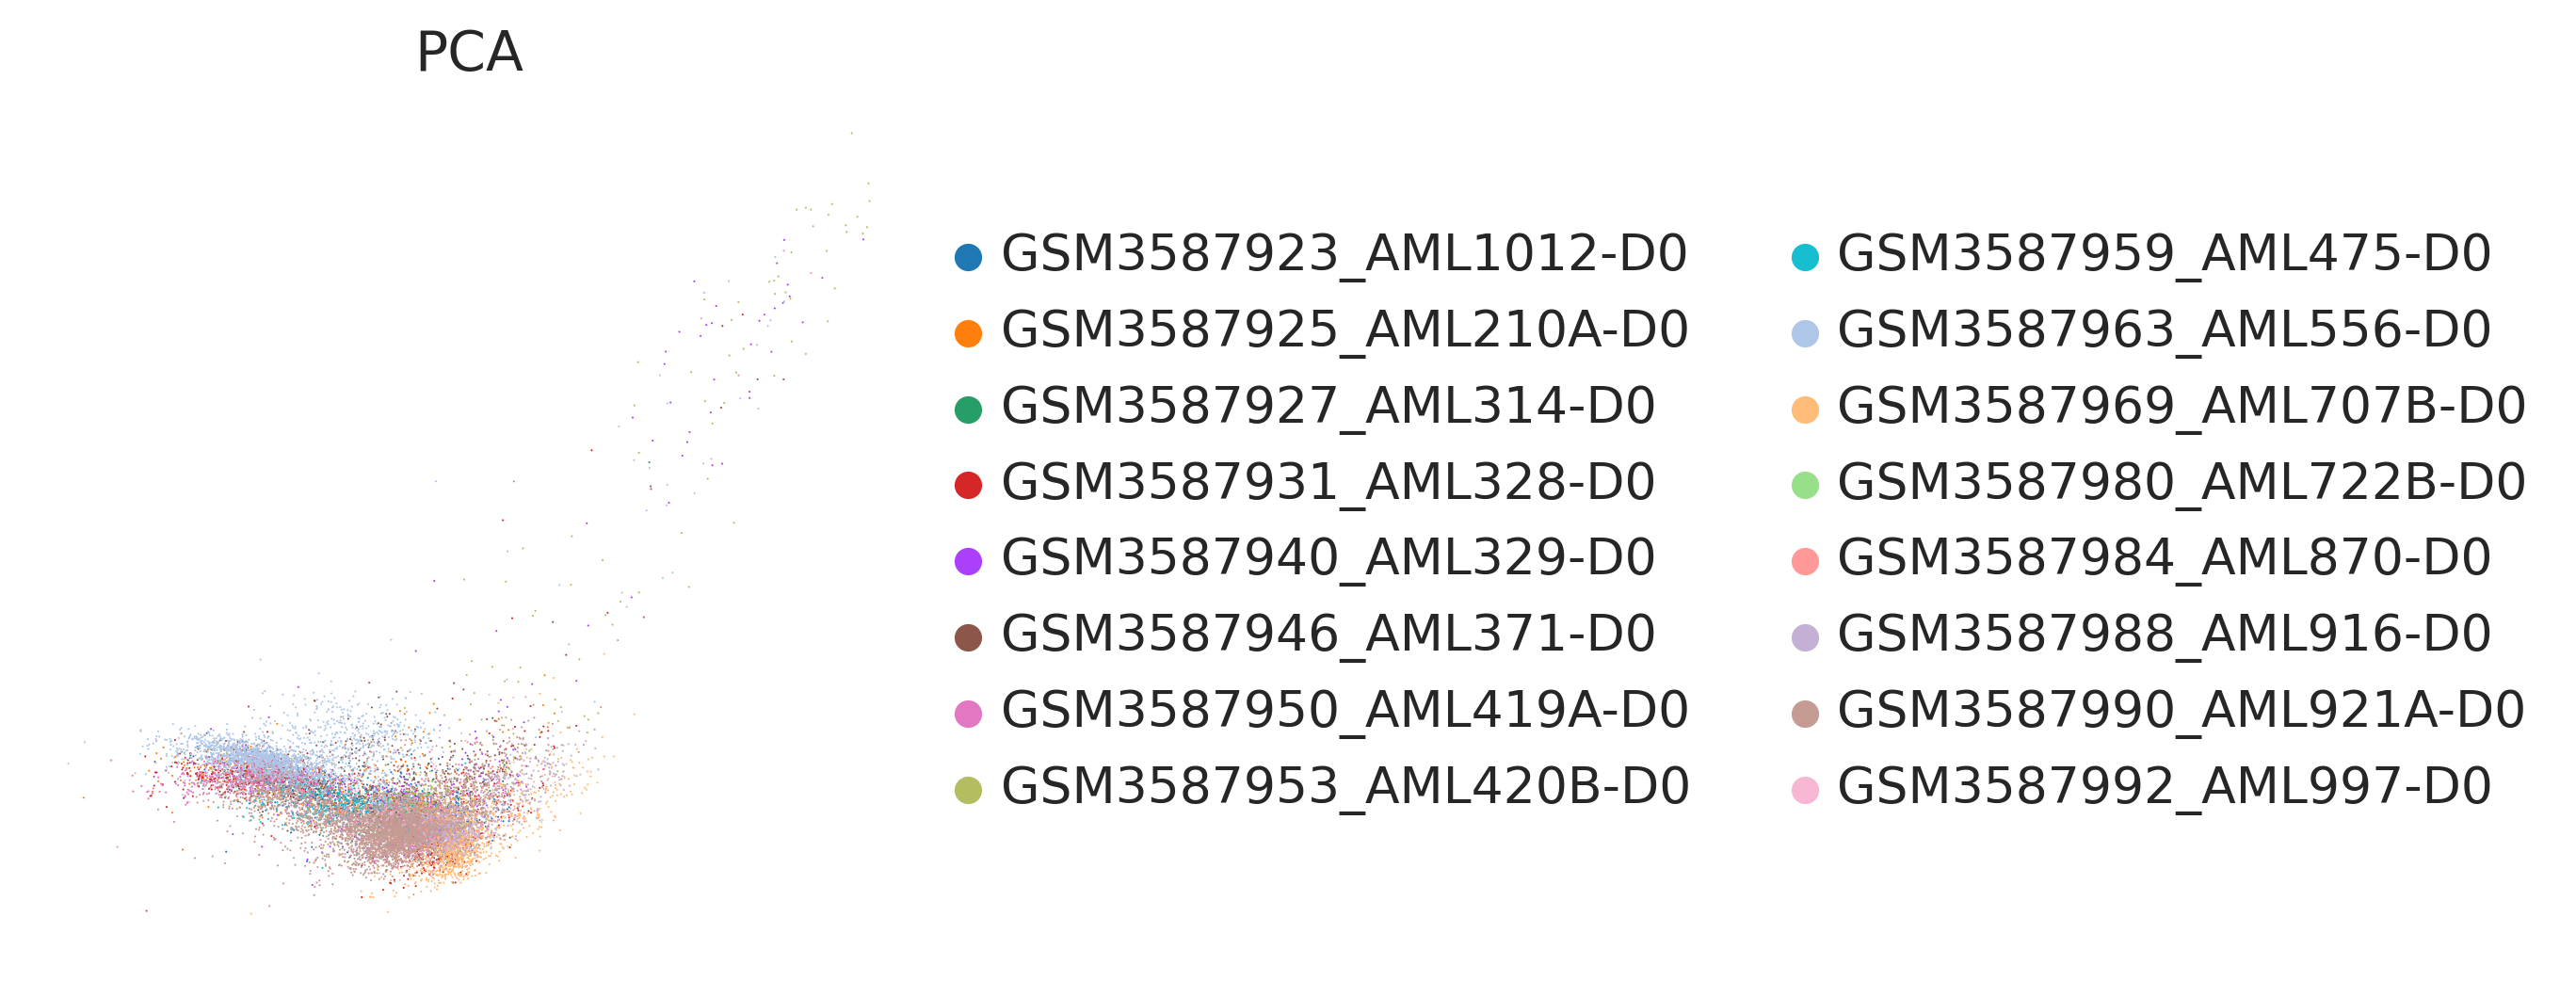

In [ ]:
sc.pl.pca(AMLadata, color="patient", frameon=False, title="PCA", s=1)

Будем устранять батч методом harmony.

In [ ]:
!gzip Harmony-0.1.0.zip

In [ ]:
!pip install harmonypy

In [ ]:
import harmonypy

2022-05-21 14:02:24,921 - harmonypy - INFO - Iteration 1 of 10
2022-05-21 14:02:52,821 - harmonypy - INFO - Iteration 2 of 10
2022-05-21 14:03:09,474 - harmonypy - INFO - Iteration 3 of 10
2022-05-21 14:03:27,389 - harmonypy - INFO - Iteration 4 of 10
2022-05-21 14:03:56,267 - harmonypy - INFO - Iteration 5 of 10
2022-05-21 14:04:09,207 - harmonypy - INFO - Iteration 6 of 10
2022-05-21 14:04:23,961 - harmonypy - INFO - Iteration 7 of 10
2022-05-21 14:04:31,811 - harmonypy - INFO - Iteration 8 of 10
2022-05-21 14:04:42,052 - harmonypy - INFO - Iteration 9 of 10
2022-05-21 14:04:48,685 - harmonypy - INFO - Iteration 10 of 10
2022-05-21 14:05:01,079 - harmonypy - INFO - Converged after 10 iterations


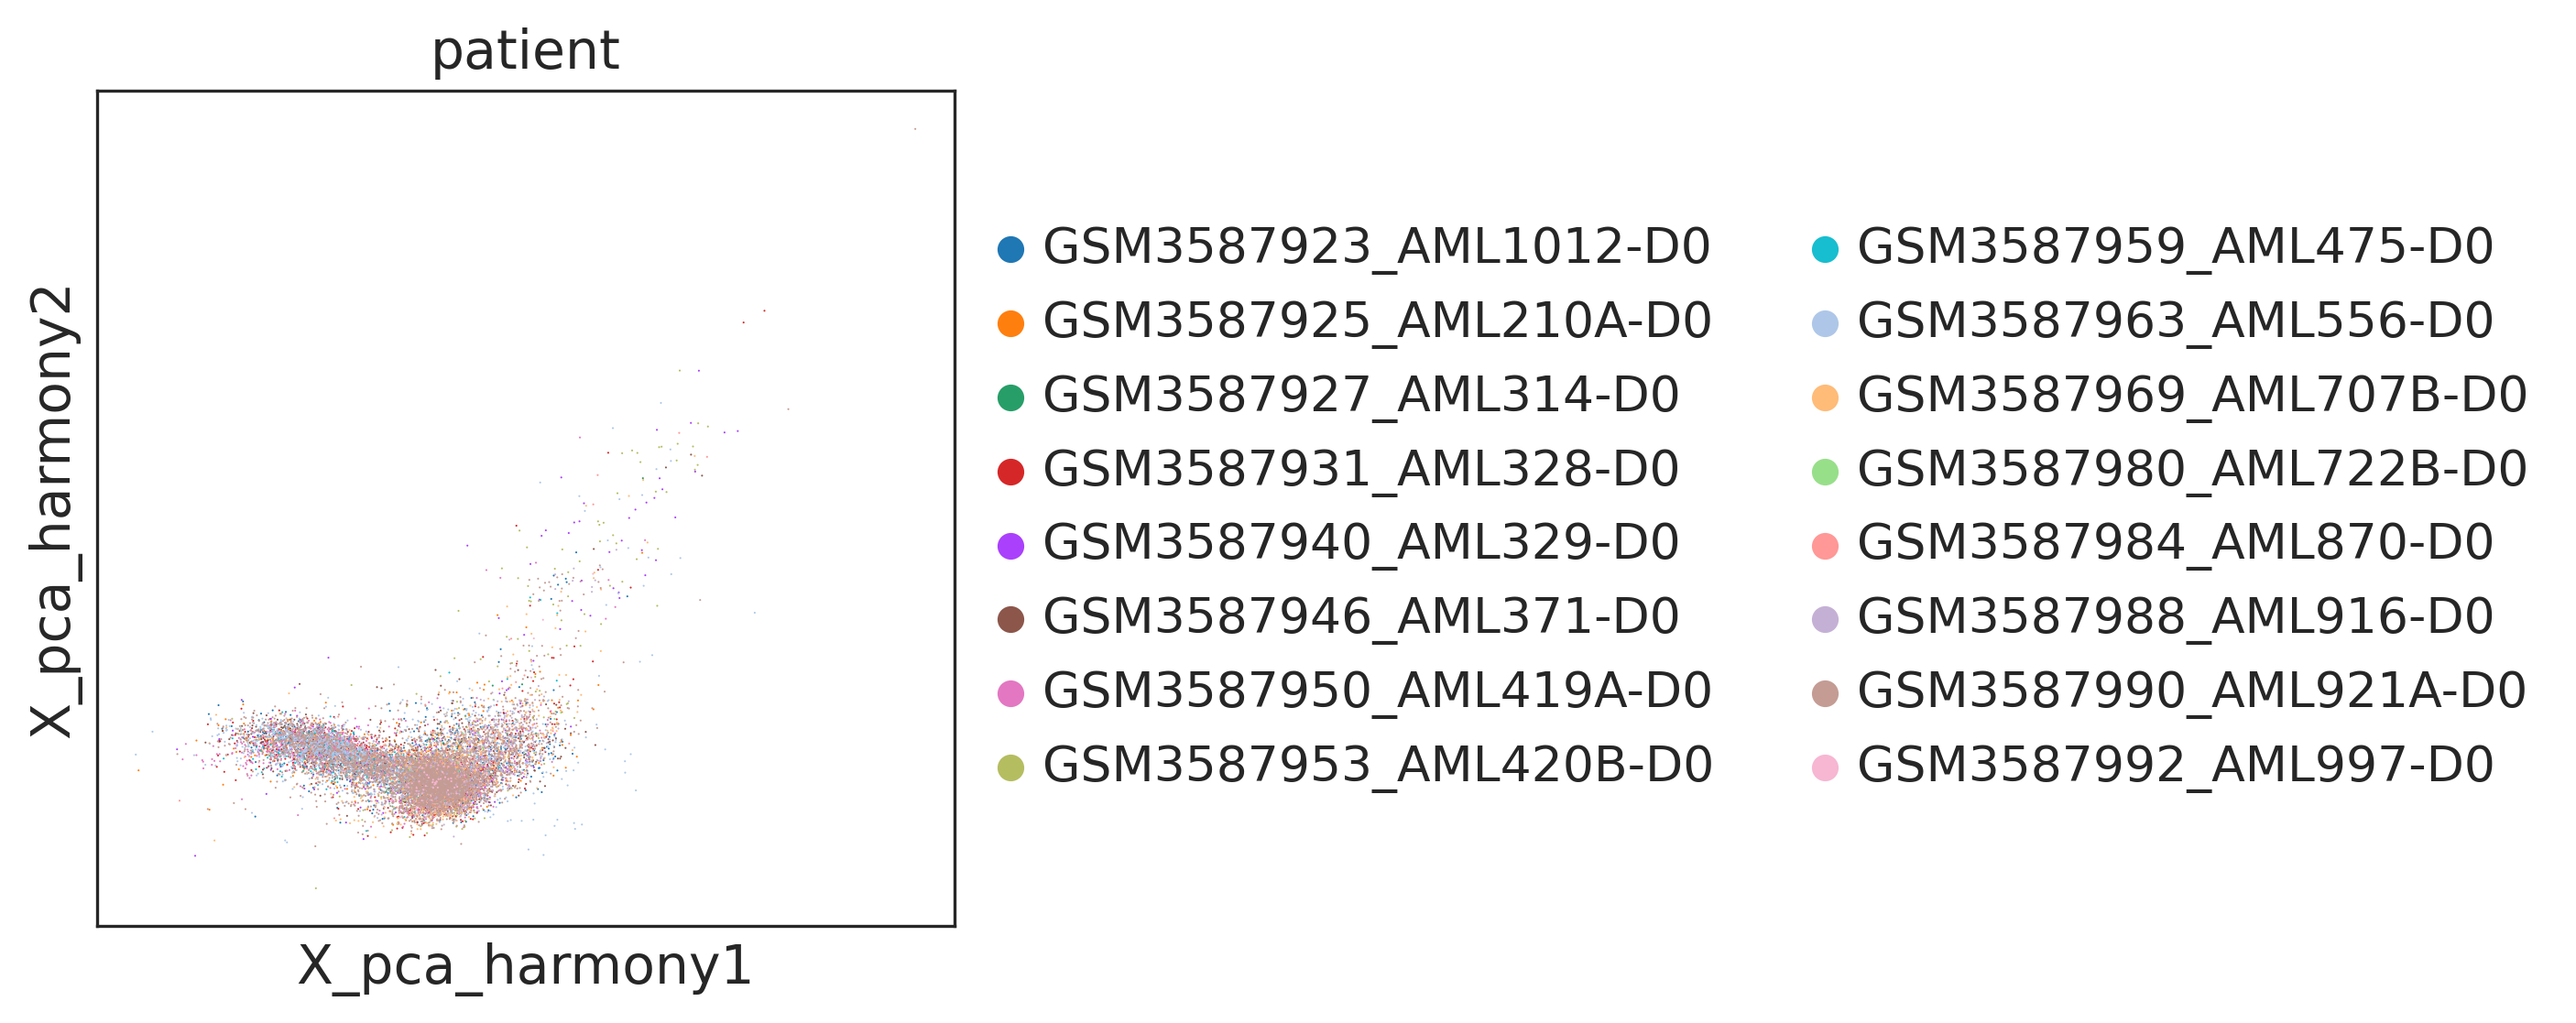

In [ ]:
sce.pp.harmony_integrate(AMLadata, key="patient", theta=2) #батч коррекция методом harmony
sc.pl.embedding(AMLadata, color="patient", basis="X_pca_harmony", s=1)

Теперь пострим граф соседей и выведем UMAP с разметкой по образцам.

In [ ]:
sc.pp.neighbors(AMLadata, n_pcs=15, n_neighbors=50,
                use_rep="X_pca_harmony")
sc.tl.umap(AMLadata)
sc.pl.umap(AMLadata, color="patient")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:59)
computing UMAP


Проведем кластеризацию клеток методом leiden.

In [52]:
!pip install leidenalg

     |████████████████████████████████| 1.3 MB 4.4 MB/s 
     |████████████████████████████████| 3.1 MB 33.0 MB/s 


In [53]:
sc.tl.leiden(AMLadata, resolution=1)

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:38)


Отрисуем получившиеся кластера.

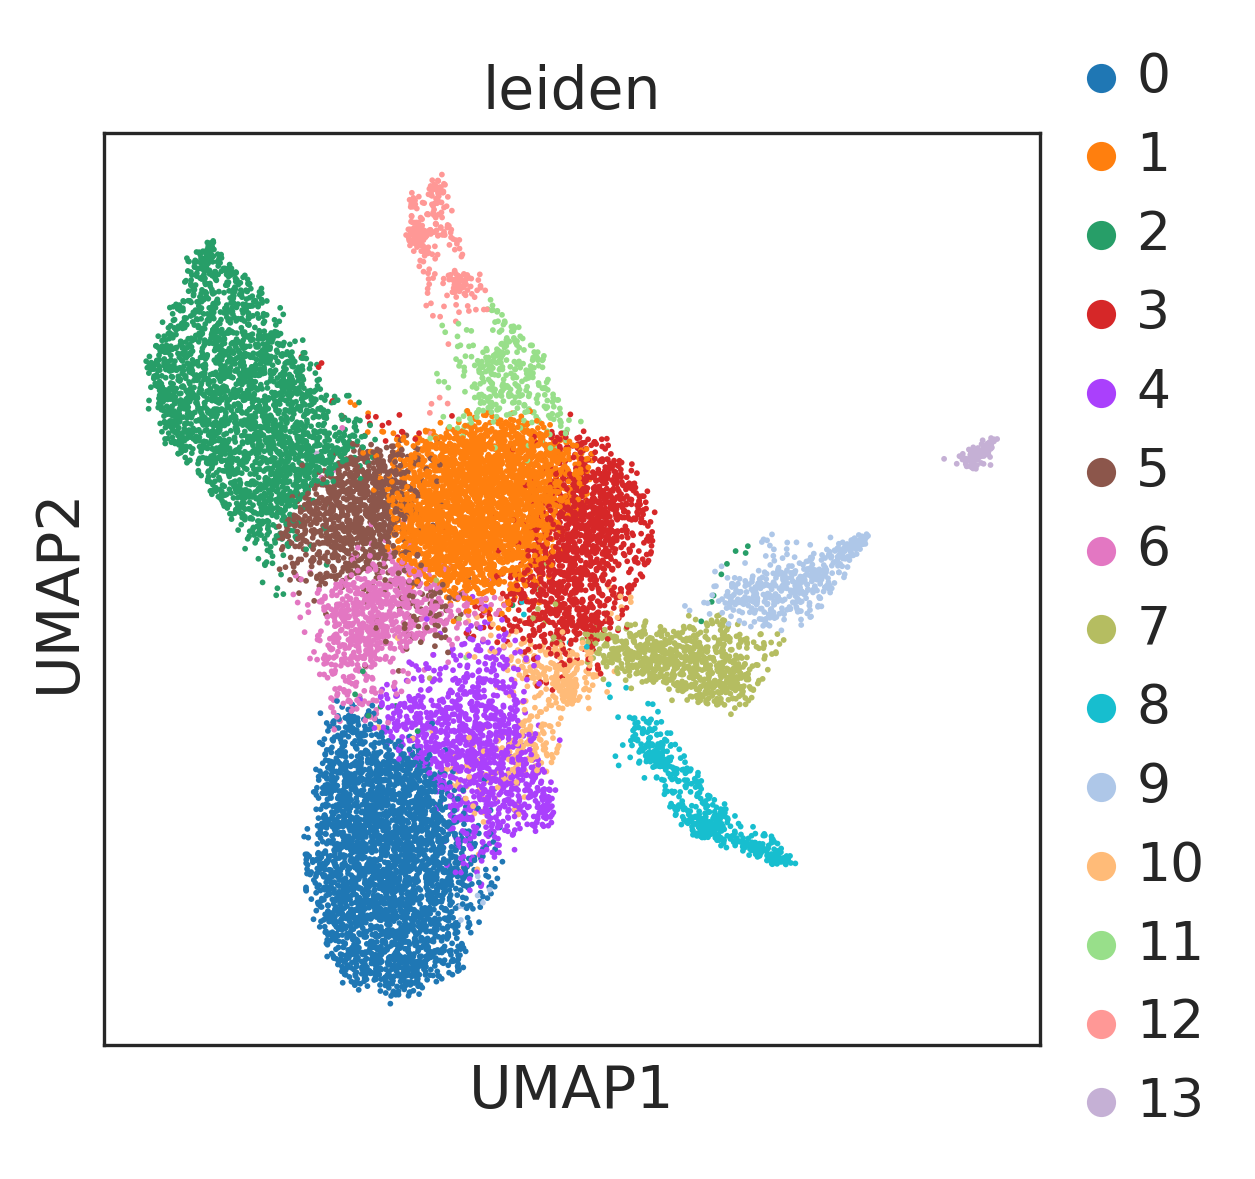

In [54]:
sc.pl.umap(AMLadata, color="leiden")

## Проценты клеток из статьи

In [55]:
file_names = [
    'GSM3587924_AML1012-D0',
    'GSM3587926_AML210A-D0',
    'GSM3587928_AML314-D0',
    'GSM3587932_AML328-D0',
    'GSM3587941_AML329-D0',
    'GSM3587947_AML371-D0',
    'GSM3587951_AML419A-D0',
    'GSM3587954_AML420B-D0',
    'GSM3587960_AML475-D0',
    'GSM3587964_AML556-D0',
    'GSM3587970_AML707B-D0',
    'GSM3587981_AML722B-D0',
    'GSM3587985_AML870-D0',
    'GSM3587989_AML916-D0',
    'GSM3587991_AML921A-D0',
    'GSM3587993_AML997-D0'
]

In [56]:
AML = pd.DataFrame()

for name in file_names:
    AML = pd.concat([AML, pd.read_csv(name + '.anno.txt', sep = '\t')])

In [57]:
annot = pd.DataFrame(AML[['CellType', 'Cell']])
annot['ind'] = AML['Cell']
annot = annot.set_index('Cell')

In [58]:
ind = []
for i in AMLadata.obs.index:
    ind.append(i[:-2])

In [59]:
AMLadata.obs['ind'] = ind

In [60]:
AMLadata.obs

,patient,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,ind
AML1012-D0_AAAAAGTTACGT-0,GSM3587923_AML1012-D0,670,1464.0,30.0,2.049180,1,AML1012-D0_AAAAAGTTACGT
AML1012-D0_AAAACACCAATC-0,GSM3587923_AML1012-D0,1713,4810.0,197.0,4.095634,1,AML1012-D0_AAAACACCAATC
AML1012-D0_AAAATAGCCTTT-0,GSM3587923_AML1012-D0,853,2305.0,90.0,3.904555,3,AML1012-D0_AAAATAGCCTTT
AML1012-D0_AAACATTAAACG-0,GSM3587923_AML1012-D0,976,2266.0,57.0,2.515446,6,AML1012-D0_AAACATTAAACG
AML1012-D0_AAACCACGTGCN-0,GSM3587923_AML1012-D0,744,1561.0,54.0,3.459321,1,AML1012-D0_AAACCACGTGCN
...,...,...,...,...,...,...,...
AML997-D0_GAGGATCCGGCT-15,GSM3587992_AML997-D0,972,3192.0,193.0,6.046366,12,AML997-D0_GAGGATCCGGCT-
AML997-D0_CGGTCGACGTCA-15,GSM3587992_AML997-D0,561,2222.0,6.0,0.270027,1,AML997-D0_CGGTCGACGTCA-
AML997-D0_AAGGTACGGATT-15,GSM3587992_AML997-D0,957,3422.0,11.0,0.321449,3,AML997-D0_AAGGTACGGATT-
AML997-D0_ATCGATGTCACC-15,GSM3587992_AML997-D0,859,2484.0,38.0,1.529791,3,AML997-D0_ATCGATGTCACC-


In [61]:
ann_for_obs = list(AMLadata.obs.merge(annot, on = ['ind'], how = 'left')['CellType'])

In [62]:
AMLadata.obs['CellType'] = ann_for_obs

In [63]:
AMLadata.obs

,patient,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,ind,CellType
AML1012-D0_AAAAAGTTACGT-0,GSM3587923_AML1012-D0,670,1464.0,30.0,2.049180,1,AML1012-D0_AAAAAGTTACGT,GMP
AML1012-D0_AAAACACCAATC-0,GSM3587923_AML1012-D0,1713,4810.0,197.0,4.095634,1,AML1012-D0_AAAACACCAATC,GMP-like
AML1012-D0_AAAATAGCCTTT-0,GSM3587923_AML1012-D0,853,2305.0,90.0,3.904555,3,AML1012-D0_AAAATAGCCTTT,Prog-like
AML1012-D0_AAACATTAAACG-0,GSM3587923_AML1012-D0,976,2266.0,57.0,2.515446,6,AML1012-D0_AAACATTAAACG,ProMono-like
AML1012-D0_AAACCACGTGCN-0,GSM3587923_AML1012-D0,744,1561.0,54.0,3.459321,1,AML1012-D0_AAACCACGTGCN,Prog-like
...,...,...,...,...,...,...,...,...
AML997-D0_GAGGATCCGGCT-15,GSM3587992_AML997-D0,972,3192.0,193.0,6.046366,12,AML997-D0_GAGGATCCGGCT-,NaN
AML997-D0_CGGTCGACGTCA-15,GSM3587992_AML997-D0,561,2222.0,6.0,0.270027,1,AML997-D0_CGGTCGACGTCA-,NaN
AML997-D0_AAGGTACGGATT-15,GSM3587992_AML997-D0,957,3422.0,11.0,0.321449,3,AML997-D0_AAGGTACGGATT-,NaN
AML997-D0_ATCGATGTCACC-15,GSM3587992_AML997-D0,859,2484.0,38.0,1.529791,3,AML997-D0_ATCGATGTCACC-,NaN


Теперь посмотрим какие клетки где экспрессируются по аннотации)

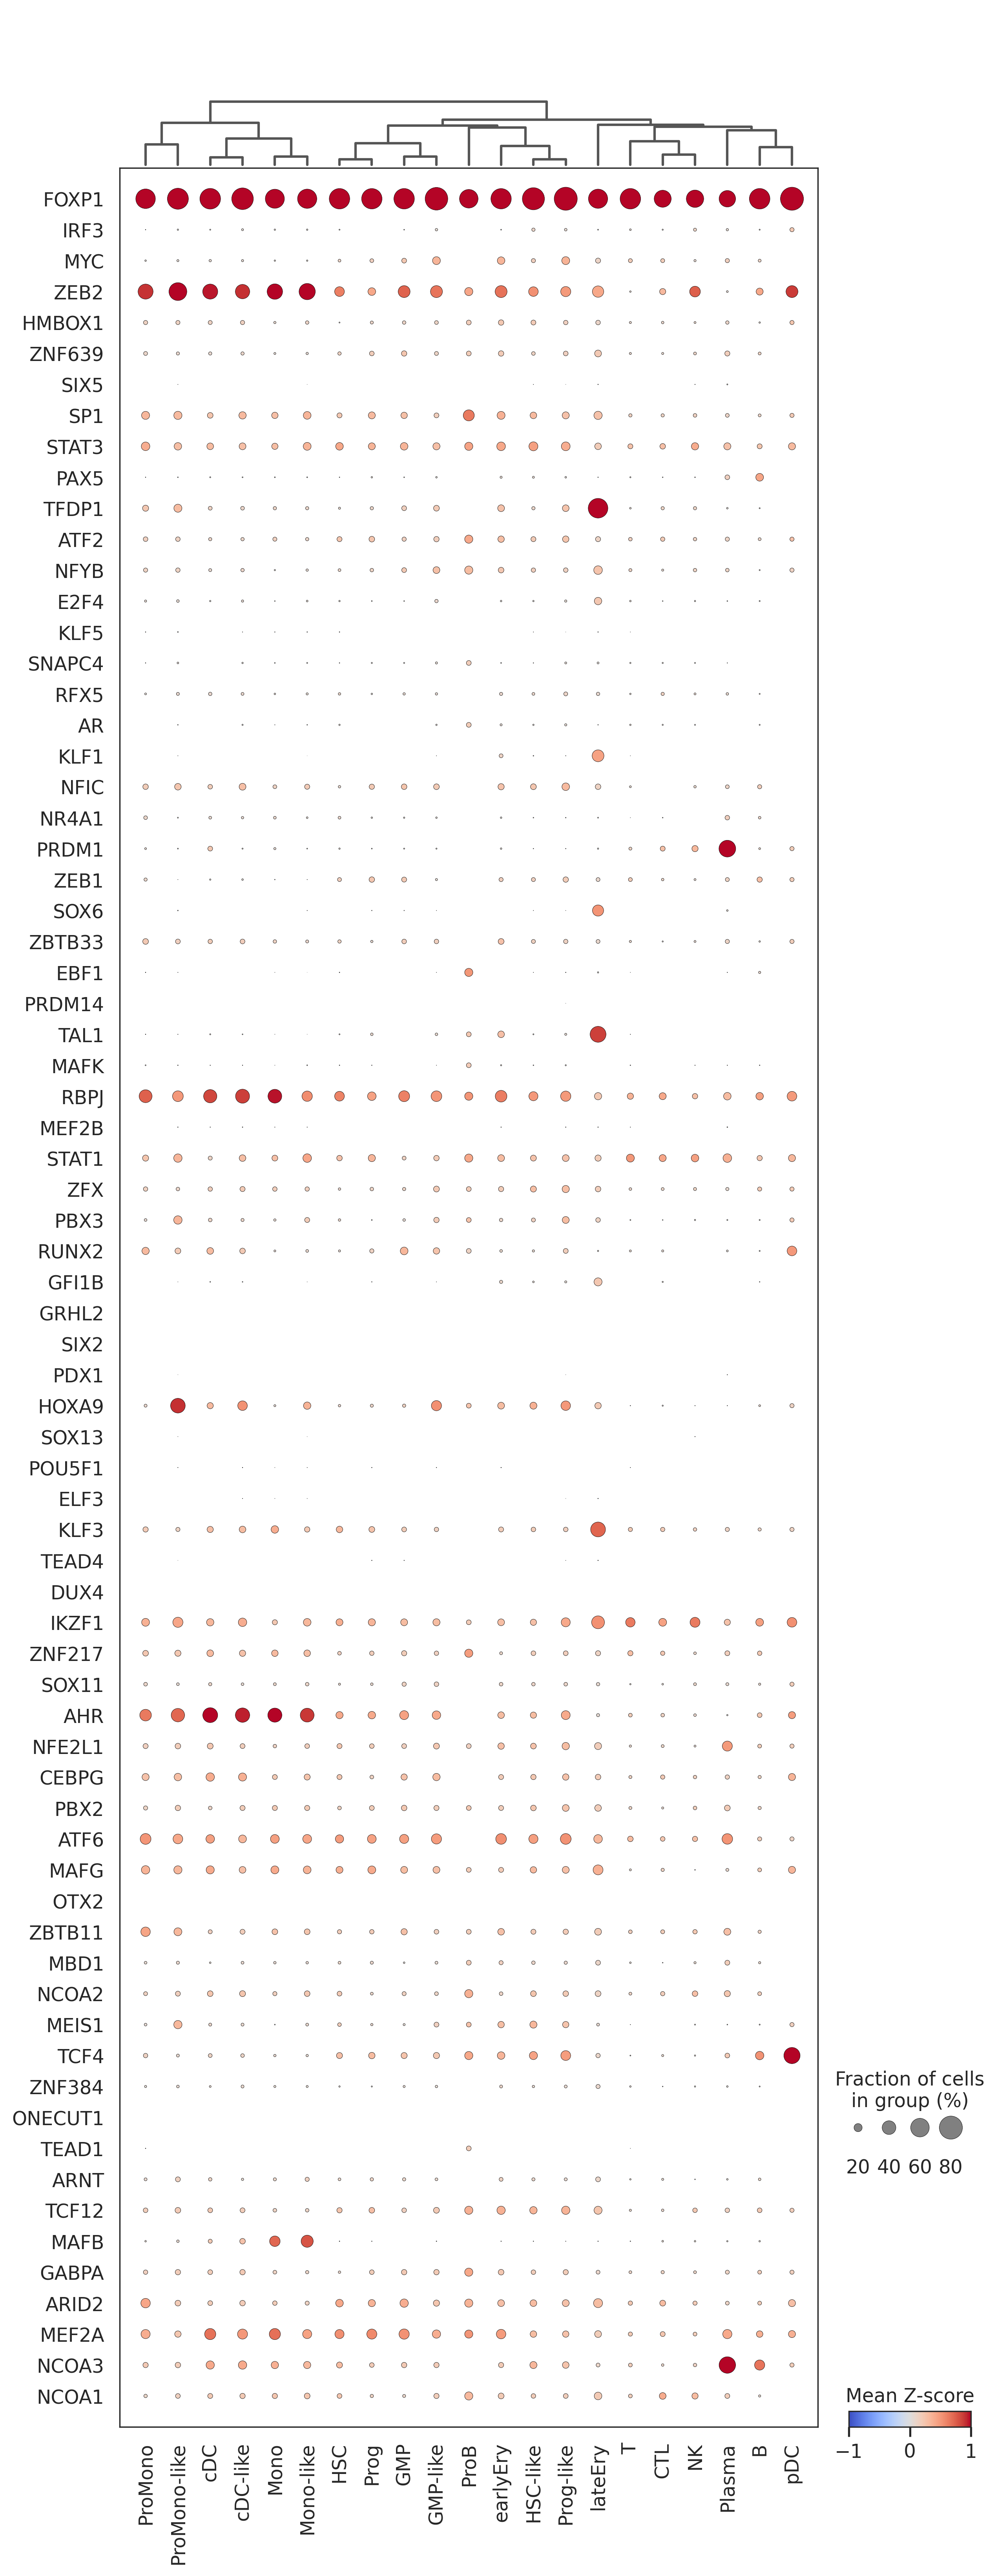

In [ ]:
sc.pl.dotplot(AMLadata, ['FOXP1', 'IRF3', 'MYC', 'ZEB2', 'HMBOX1', 'ZNF639', 'SIX5', 'SP1', 'STAT3', 'PAX5', 'TFDP1',
                         'ATF2', 'NFYB', 'E2F4', 'KLF5', 'SNAPC4', 'RFX5', 'AR', 'KLF1', 'NFIC', 'NR4A1', 'PRDM1', 
                         'ZEB1', 'SOX6', 'ZBTB33', 'EBF1', 'PRDM14', 'TAL1', 'MAFK', 'RBPJ', 'MEF2B', 'STAT1','ZFX', 'PBX3', 
                         'RUNX2','GFI1B','GRHL2','SIX2','PDX1','HOXA9','SOX13','POU5F1','ELF3','KLF3','TEAD4','DUX4','IKZF1','ZNF217',
                         'SOX11', 'AHR', 'NFE2L1', 'CEBPG', 'PBX2', 'ATF6', 'MAFG', 'OTX2', 'ZBTB11', 'MBD1','NCOA2',
                         'MEIS1', 'TCF4', 'ZNF384', 'ONECUT1', 'TEAD1', 'ARNT', 'TCF12', 'MAFB', 
                          'GABPA', 'ARID2', 'MEF2A', 'NCOA3', 'NCOA1'], 
              groupby = "CellType", #layer="scaled", 
              dendrogram=True,
              vmin=-1, vmax=1, cmap="coolwarm", colorbar_title="Mean Z-score", dot_max=0.8, swap_axes = True)

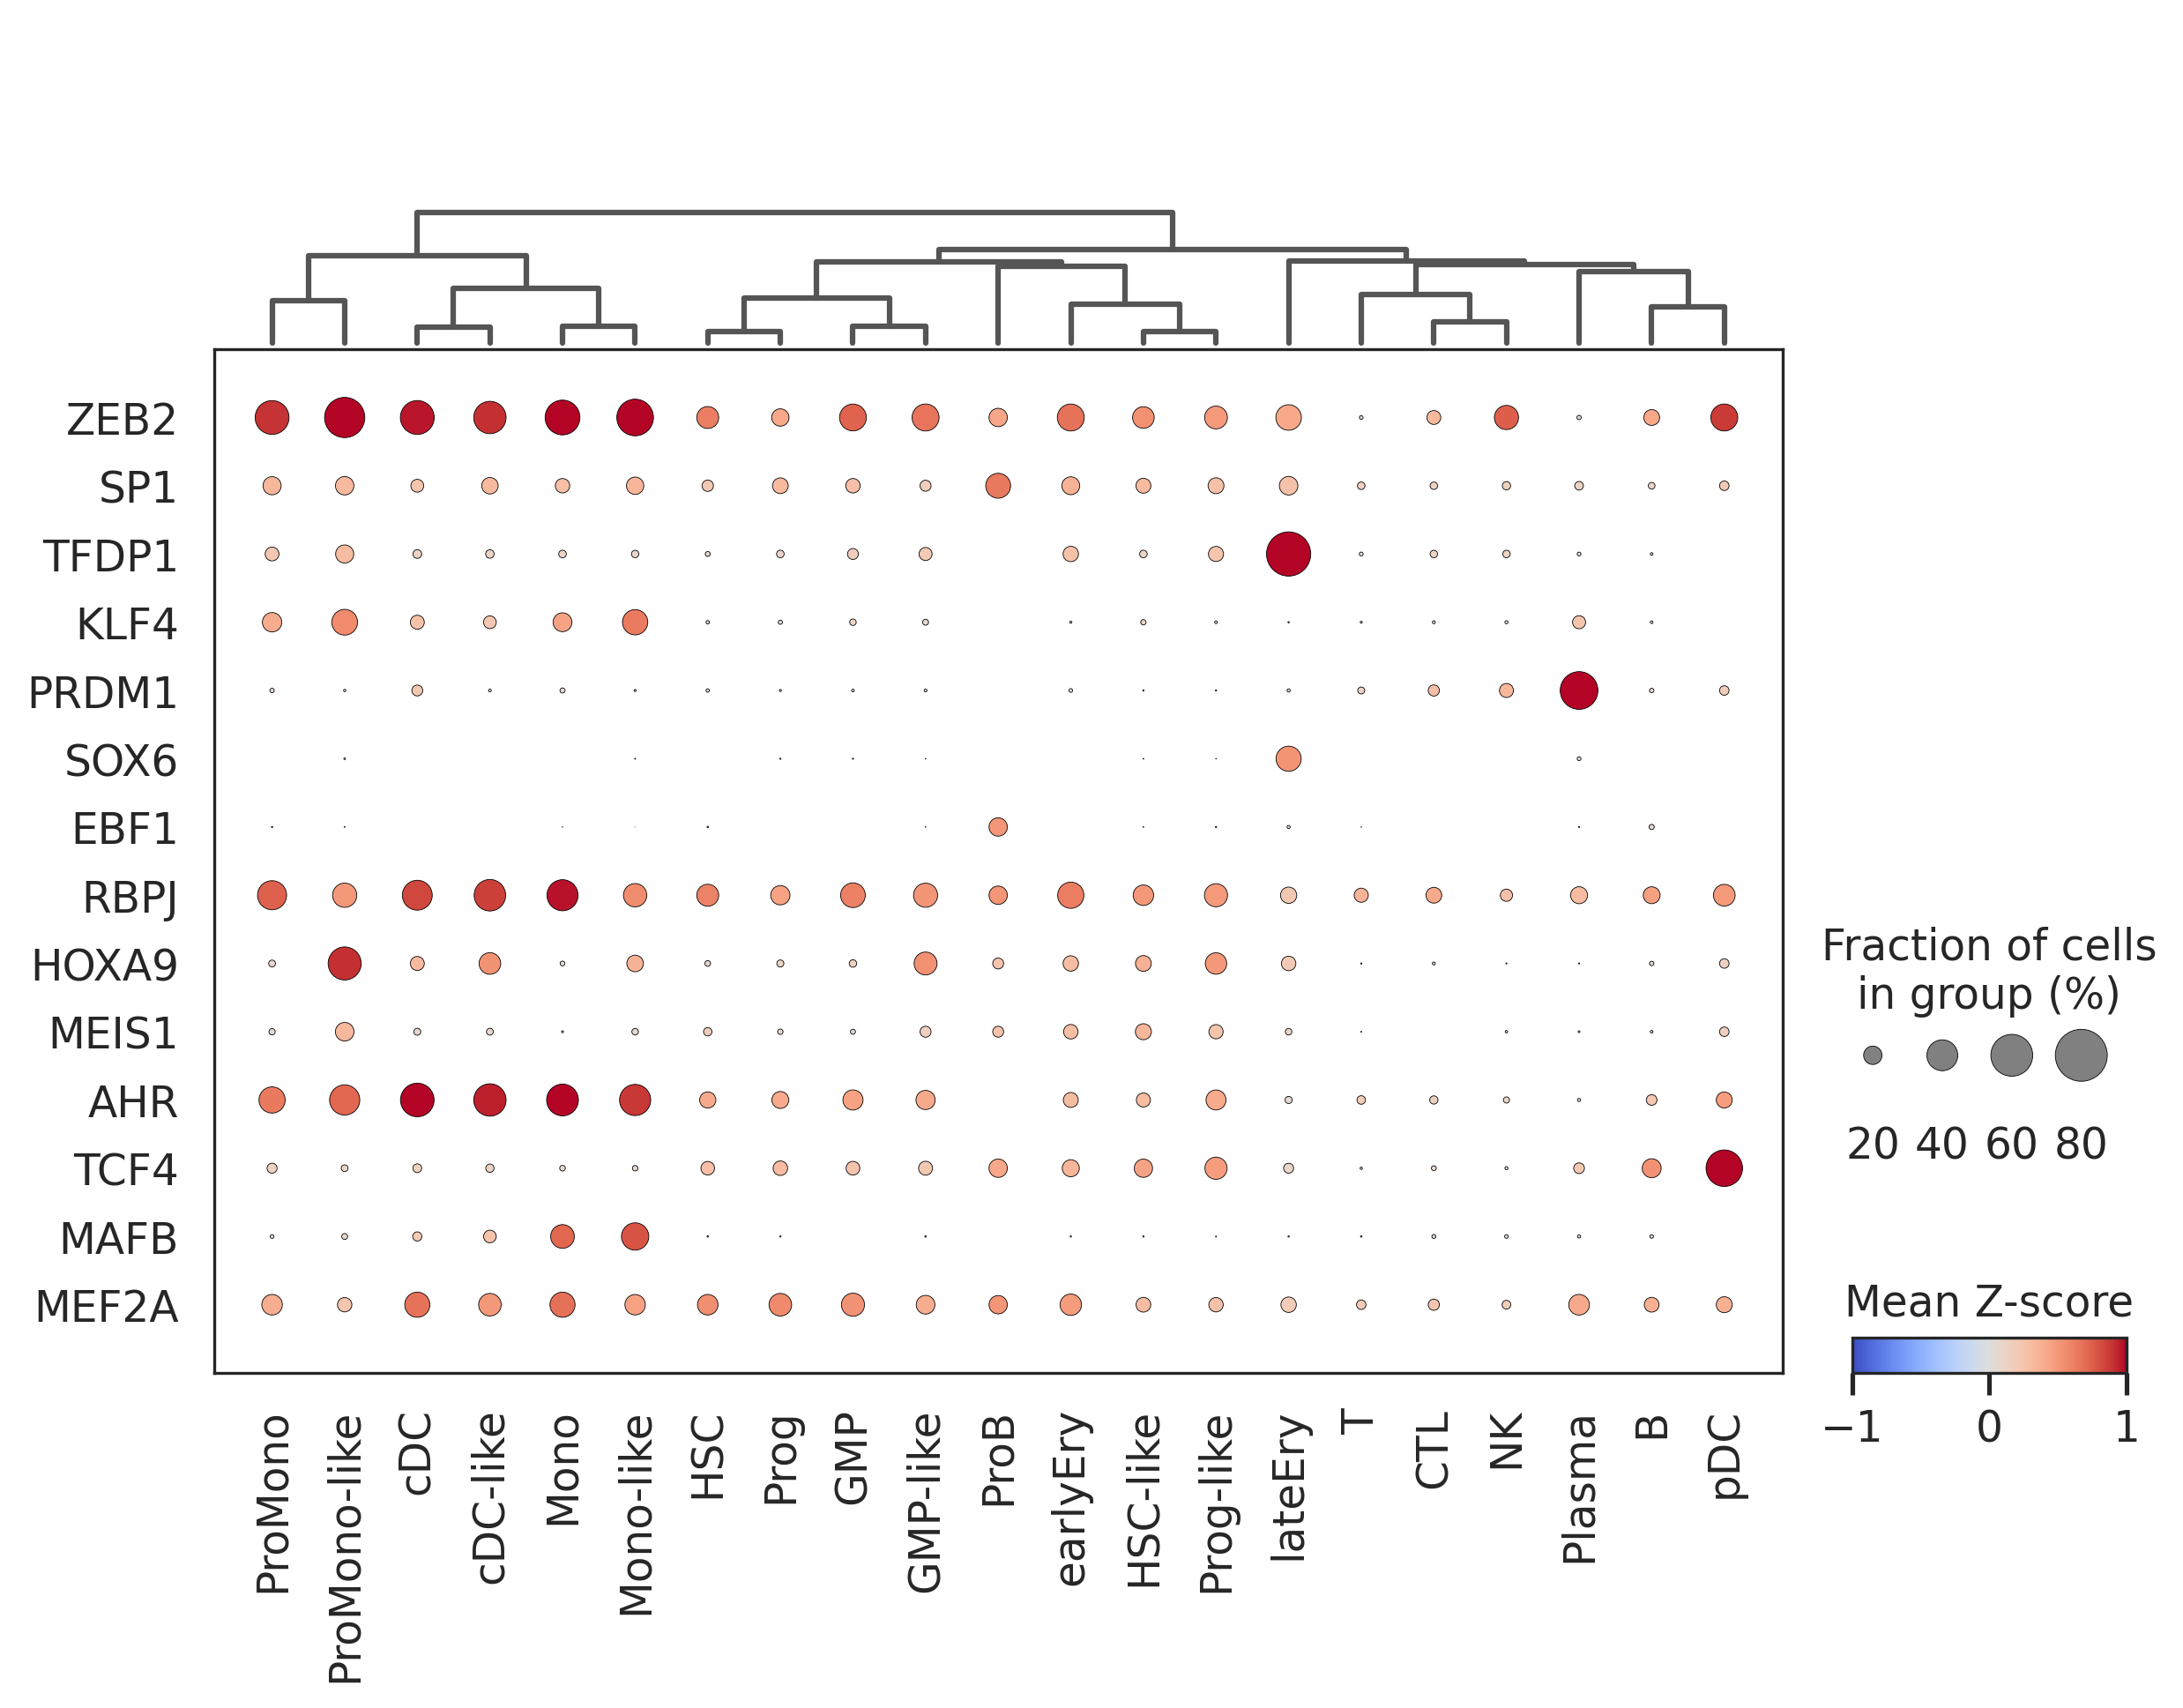

In [66]:
sc.pl.dotplot(AMLadata, ['ZEB2',  'SP1', 'TFDP1',
                           'KLF4', 'PRDM1', 
                          'SOX6',  'EBF1',  'RBPJ', 
                         'HOXA9','MEIS1',
                          'AHR',   
                          'TCF4',  'MAFB', 
                           'MEF2A'], 
              groupby = "CellType", #layer="scaled", 
              dendrogram=True,
              vmin=-1, vmax=1, cmap="coolwarm", colorbar_title="Mean Z-score", dot_max=0.8, swap_axes = True)

## Дополнительно

Теперь будем искать маркерные гены, описывающие каждый кластер.

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:24)


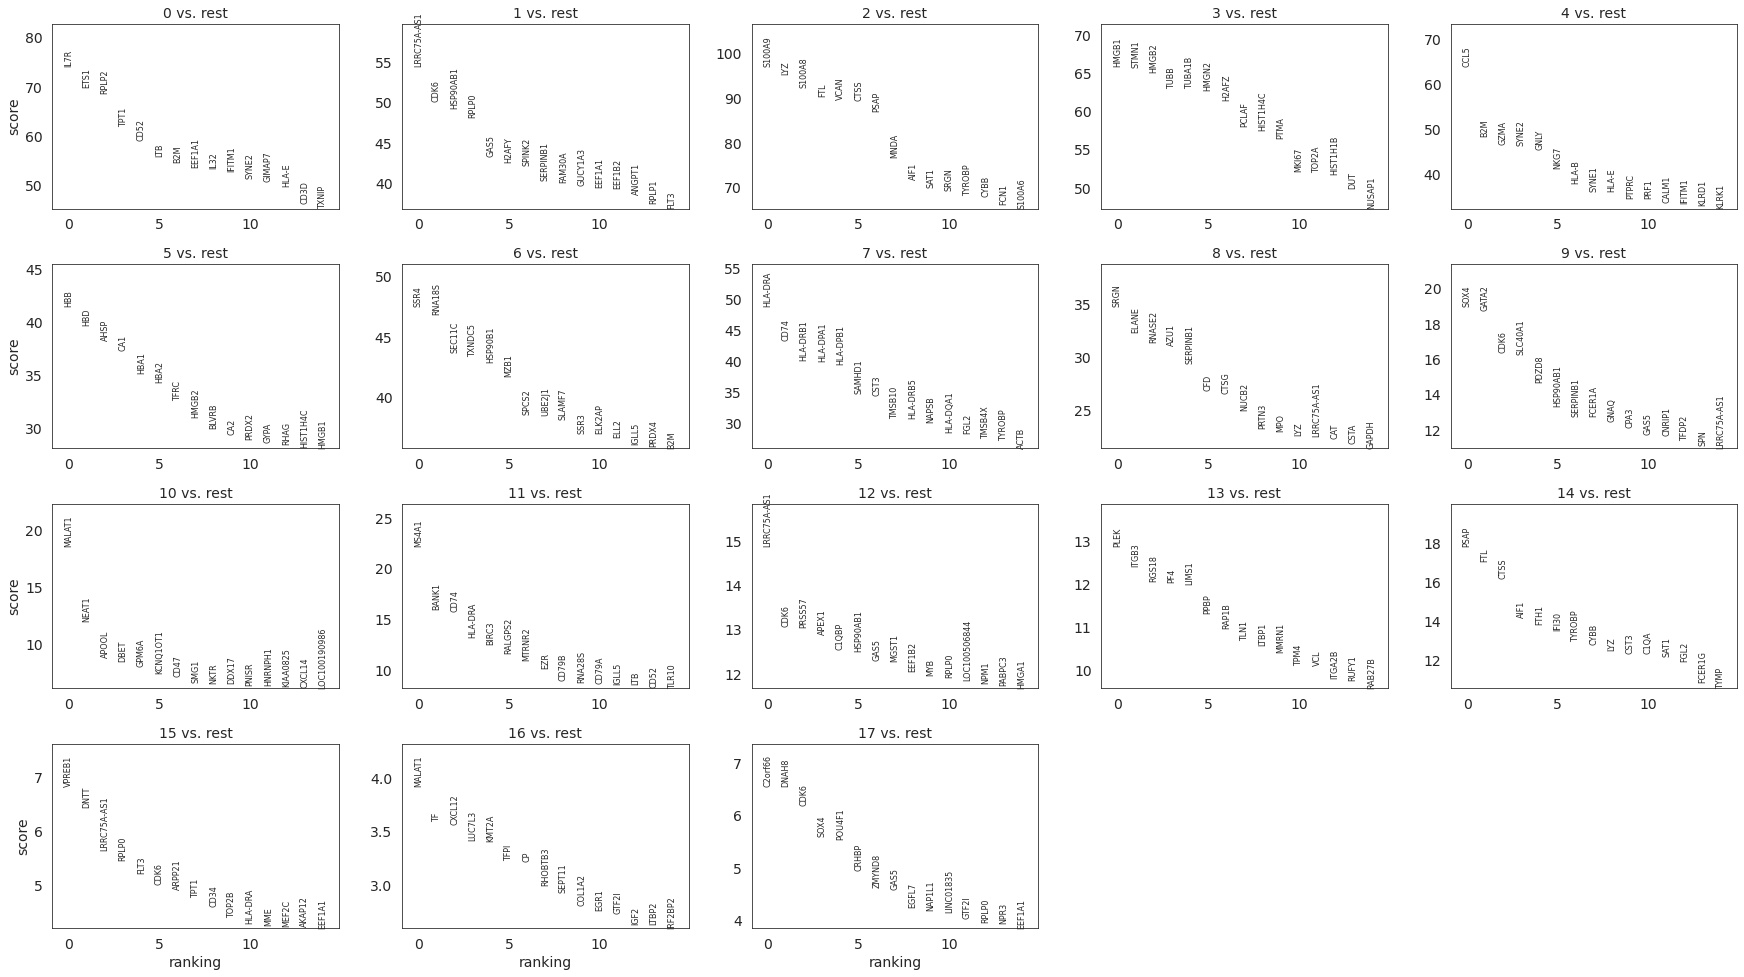

In [ ]:
sc.tl.rank_genes_groups(AMLadata, "leiden", method="wilcoxon") # Вычисление маркерных генов
sc.pl.rank_genes_groups(AMLadata, n_genes=15, sharey=False, ncols=5) # Список маркерных генов

Лучше всего нам подходят гены, которые специфично экспрессируются только в одном типе клеток. Найденные в предыдущих ячейках гены можно проверить с помощью визуализации UMAP.

TypeError: ignored

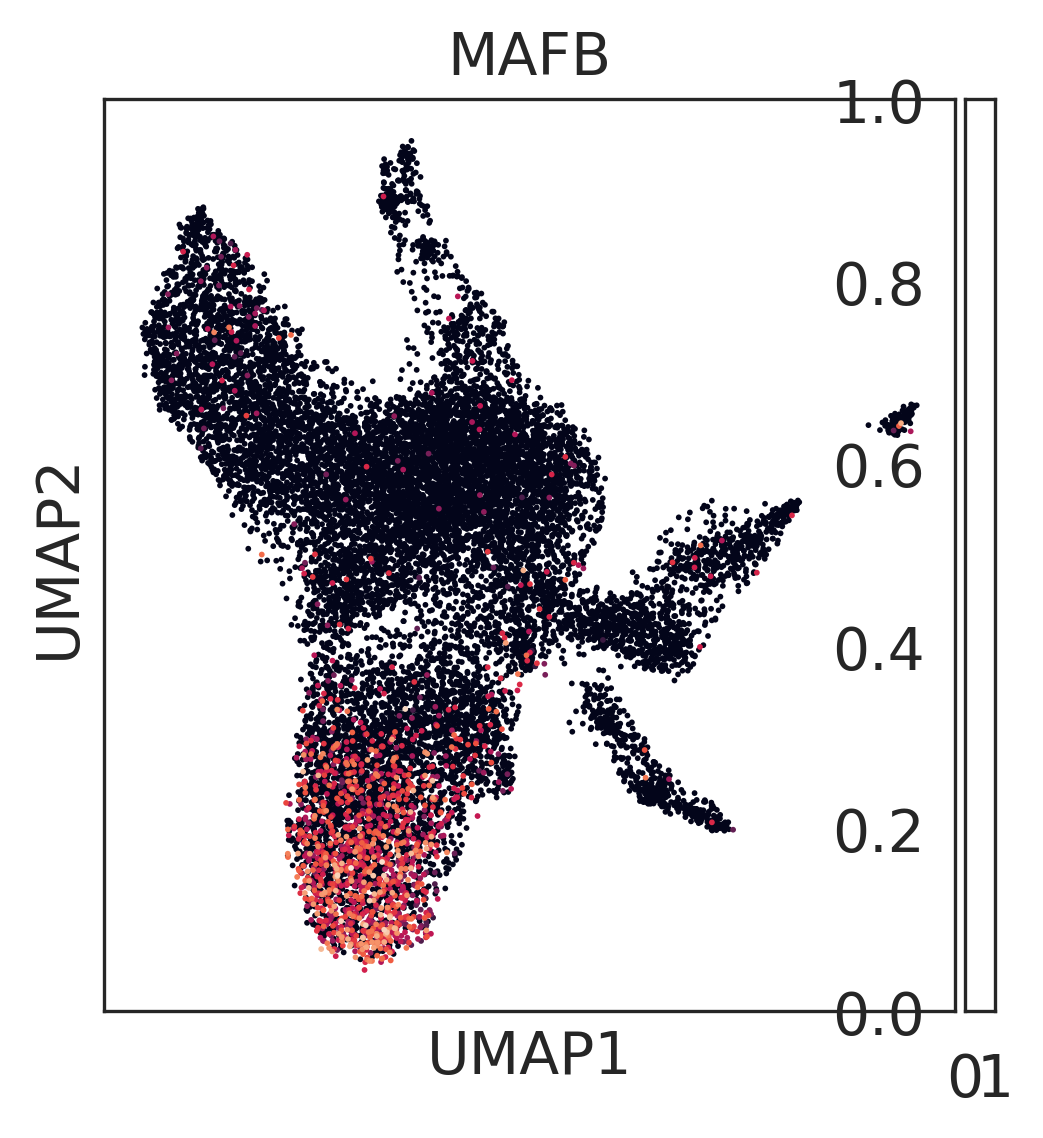

In [68]:
sc.pl.umap(AMLadata, color=['MAFB'])